# Topic: **Identifying Patterns in Vital Signs to Classify Risk Levels for Maternal Complications**

### - Author: VEMANA ANIL KUMAR

## Project Description
The project applies machine learning techniques to predict maternal health risks based on vital signs such as Age, Blood Pressure (Systolic and Diastolic), Blood Sugar, Body Temperature, and Heart Rate. The goal is to identify key indicators influencing risk levels and improve early interventions in maternal healthcare.

## Block Diagram
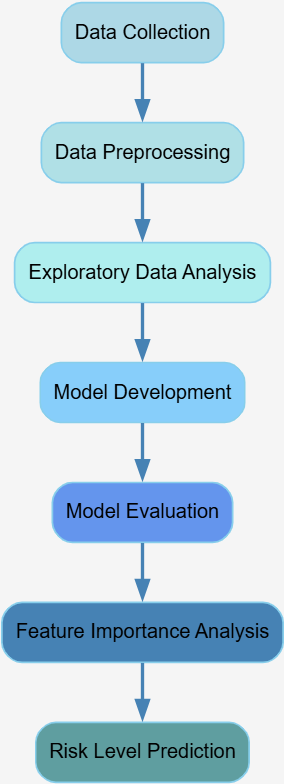

# Instructions to Run This Project:

## Step 1: Prerequisites
Ensure the following Python libraries are installed. Use the commands below in your google colab, terminal or Anaconda prompt if not already installed:

(**`pip install pandas matplotlib seaborn statsmodels missingno`**)

---

## Step 2: Dataset Placement
1. Download the dataset file named **Maternal Health Risk Data Set.csv** from the UCI Machine Learning Repository.
2. Upload the dataset by clicking on `Upload to Session Storage` on google colab or place the dataset in the same directory as this notebook if your work environment is Jupyter Notebook.
3. If the dataset is stored in a different location, update the `file_path` variable in the first code cell with the correct path.

---

## Step 3: Running the Notebook
1. Start the notebook server in the directory containing this file by running: jupyter notebook.
2. Open this notebook file (**`INFO6105_Final_Project_MH.ipynb`**) in the Jupyter Notebook interface.
3. Run each cell sequentially by:
- Pressing `Shift + Enter` or
- Clicking the `Run` button in the toolbar.
4. If your work environment is google colab, open this notebook file (**`INFO6105_Final_Project_MH.ipynb`**) and run each cell from the beginning by clicking on `Run Cell` or by pressing `Shift + Enter`.

---
## Step 4: Troubleshooting
- **Dataset Issues**:
- Ensure that all required columns (`Age`, `SystolicBP`, `DiastolicBP`, `BS`, `BodyTemp`, `HeartRate`, `RiskLevel`) are present in the dataset.
- If column names differ, update the relevant code cells accordingly

## Step 5: Review Outputs and Interpret Results
- The notebook includes steps for:
- **Data Loading**: Displaying the first few rows, missing values, and column types.
- **Data Cleaning**: Removing outliers and encoding categorical variables.
- **Visualization**: Generating plots such as:
 - Risk Level vs. Each of the columns('Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate') using box plots and count plots.
 - Histogram for distribution of each of the columns('Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate')
 - Piechart for risklevels
 - Correlation heatmaps, Q-Q Plot, Confusion Matrix
- Check the outputs and plots to gain insights into factors affecting Maternal Health and identifying the most dominant feature among them.

---

## Step 6: Customization for Analysis
- Update encoding or cleaning steps if the dataset contains new categories or data formats.
- Modify plot parameters for better visualization or tailored analysis.

---
- **Library Errors**:
- Verify that all libraries are correctly installed as listed in **Step 1**.

---




In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Maternal Health Risk dataset
file_path = '/content/Maternal Health Risk Data Set.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display the structure and data types of the dataset
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Display basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(data.describe())

# Countplot for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nValue Counts for {column}:")
    print(data[column].value_counts())


First few rows of the dataset:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
mem

<Axes: >

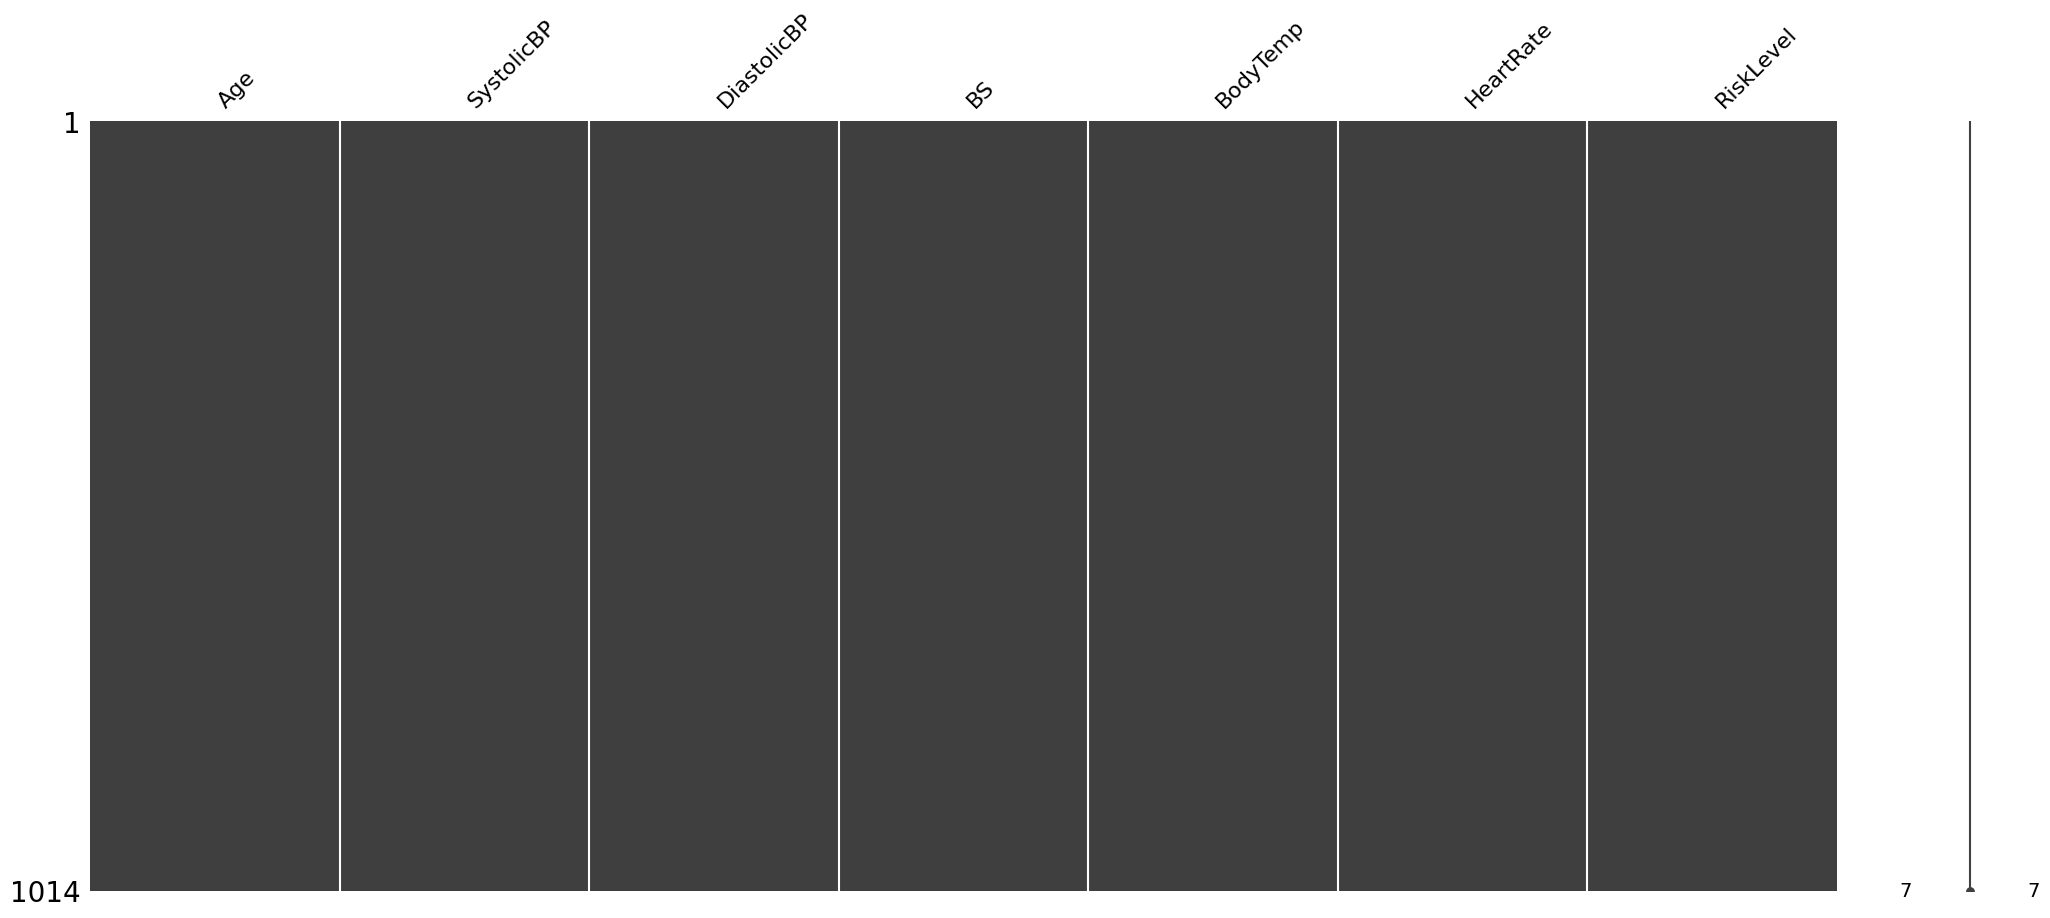

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-6-9d7394adf71e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RiskLevel', y=col, data=data, palette='Set3')
<ipython-input-6-9d7394adf71e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RiskLevel', y=col, data=data, palette='Set3')
<ipython-input-6-9d7394adf71e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RiskLevel', y=col, data=data, palette='Set3')
<ipython-input-6-9d7394adf71e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

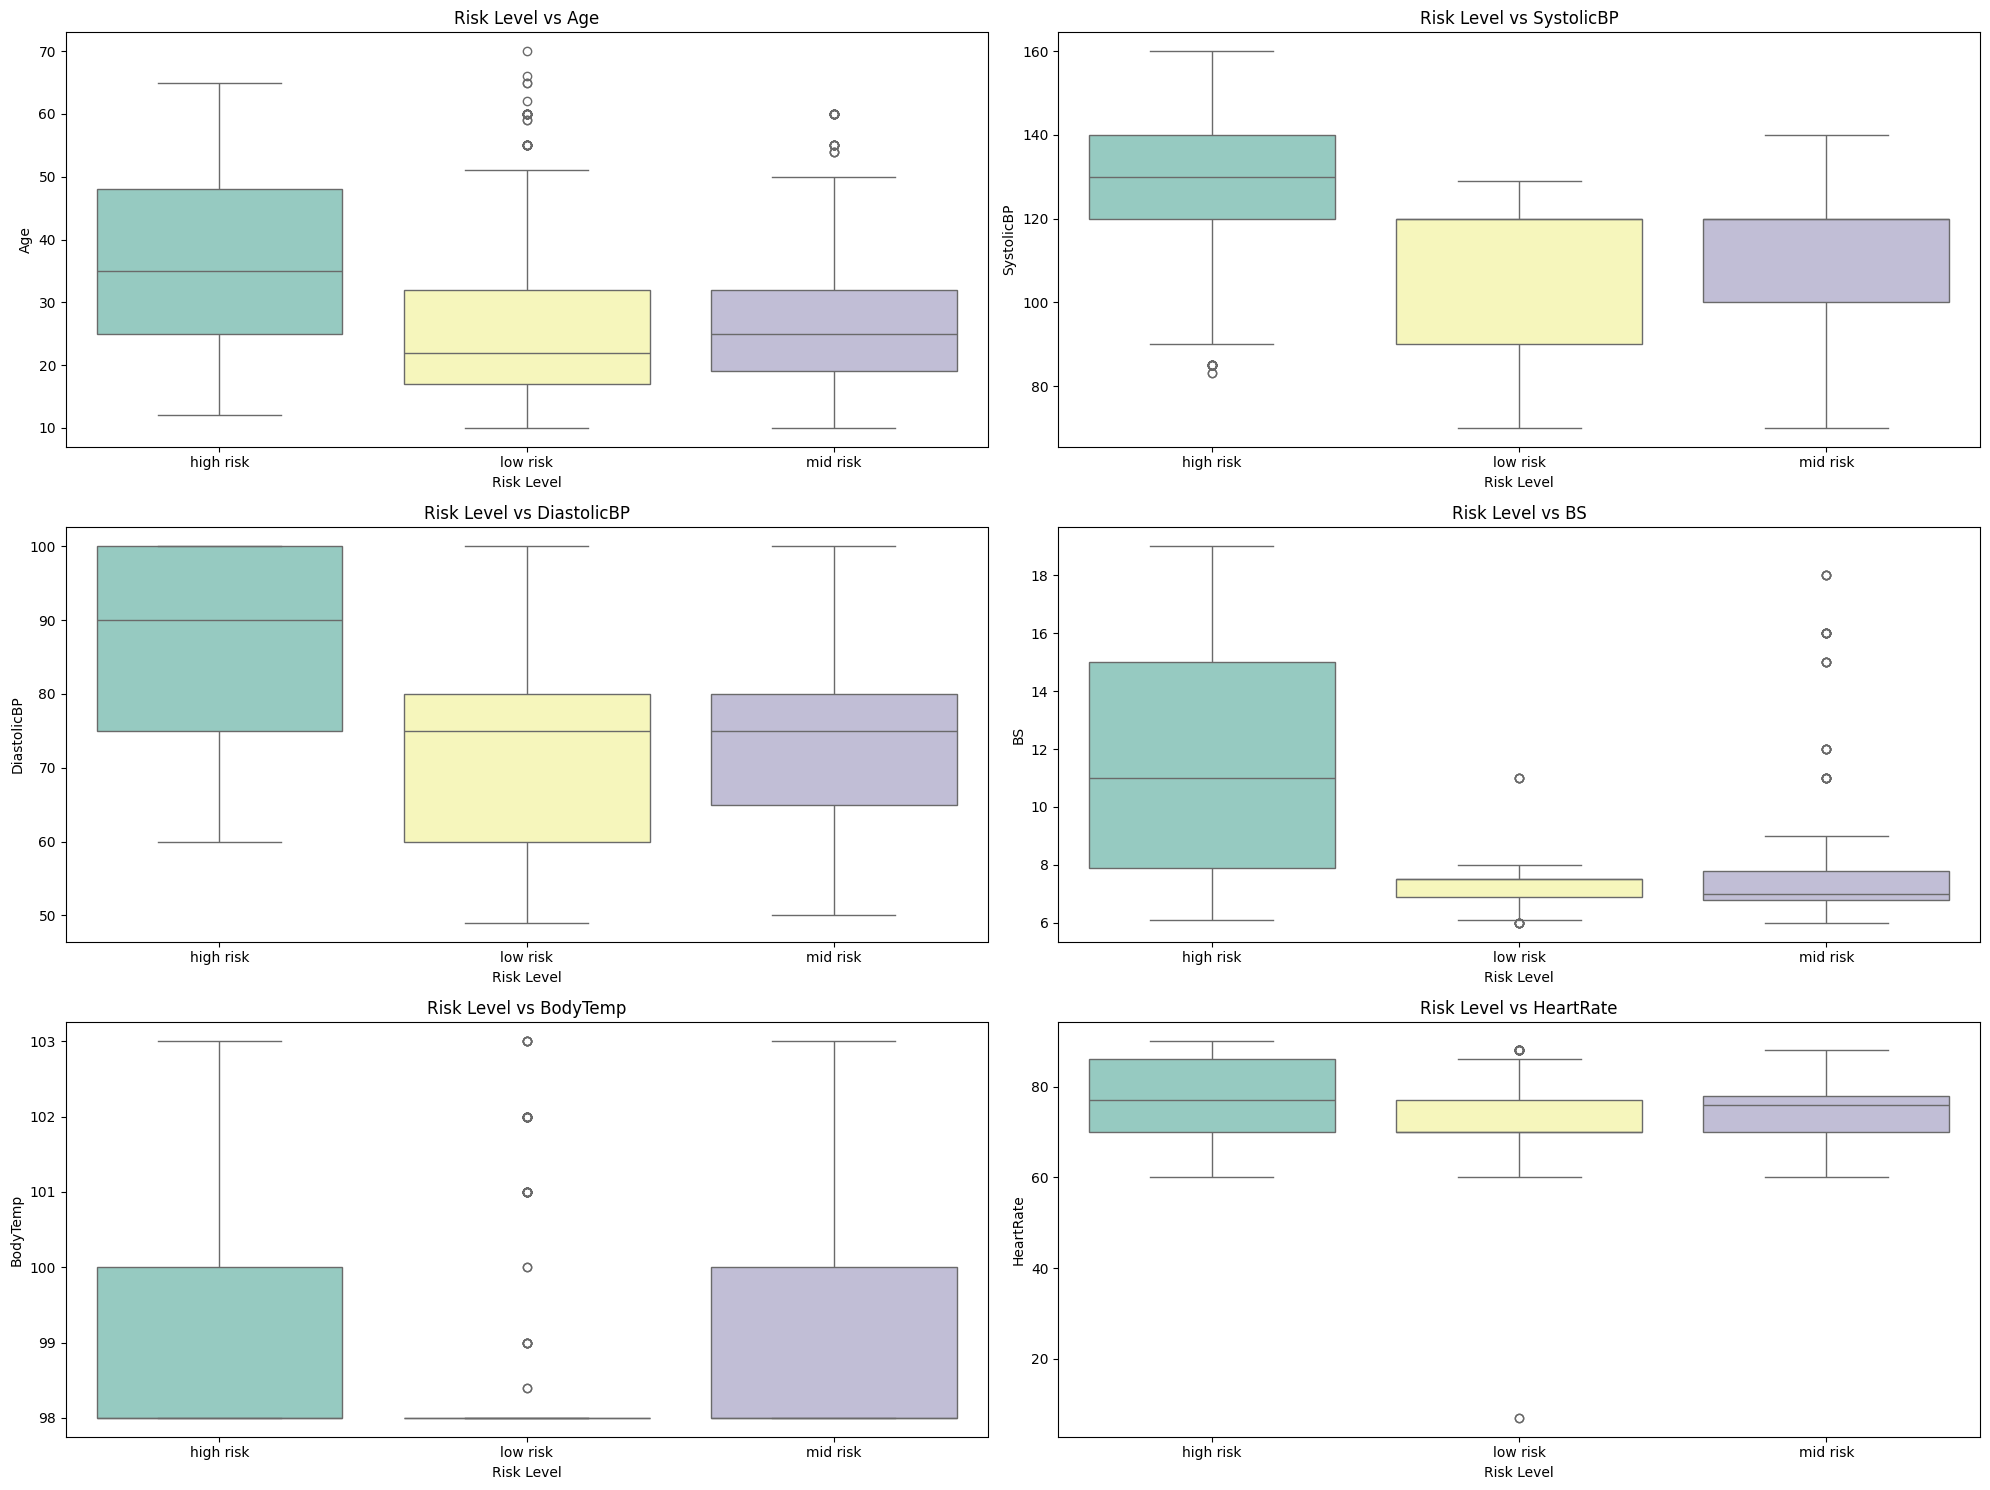

In [ ]:
# Encode RiskLevel
def encode_risk(value):
    mapping = {"low risk": 1, "mid risk": 2, "high risk": 3}
    return mapping.get(value.lower(), 0)  # Default to 0 for unknown values

# Apply encoding to the 'RiskLevel' column
if 'RiskLevel' in data.columns:
    data['RiskLevel_encoded'] = data['RiskLevel'].apply(encode_risk)
else:
    raise ValueError("Column 'RiskLevel' not found in the dataset.")

# Define columns for comparison
columns_to_compare = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Create visualizations for each column
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_compare, 1):
    plt.subplot(3, 2, i)  # Create a grid layout: 3 rows, 2 columns
    if col in data.columns:
        # Use boxplot to visualize the distribution
        sns.boxplot(x='RiskLevel', y=col, data=data, palette='Set3')
        plt.title(f'Risk Level vs {col}')
        plt.xlabel('Risk Level')
        plt.ylabel(col)
    else:
        print(f"Column '{col}' not found in the dataset. Skipping visualization.")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

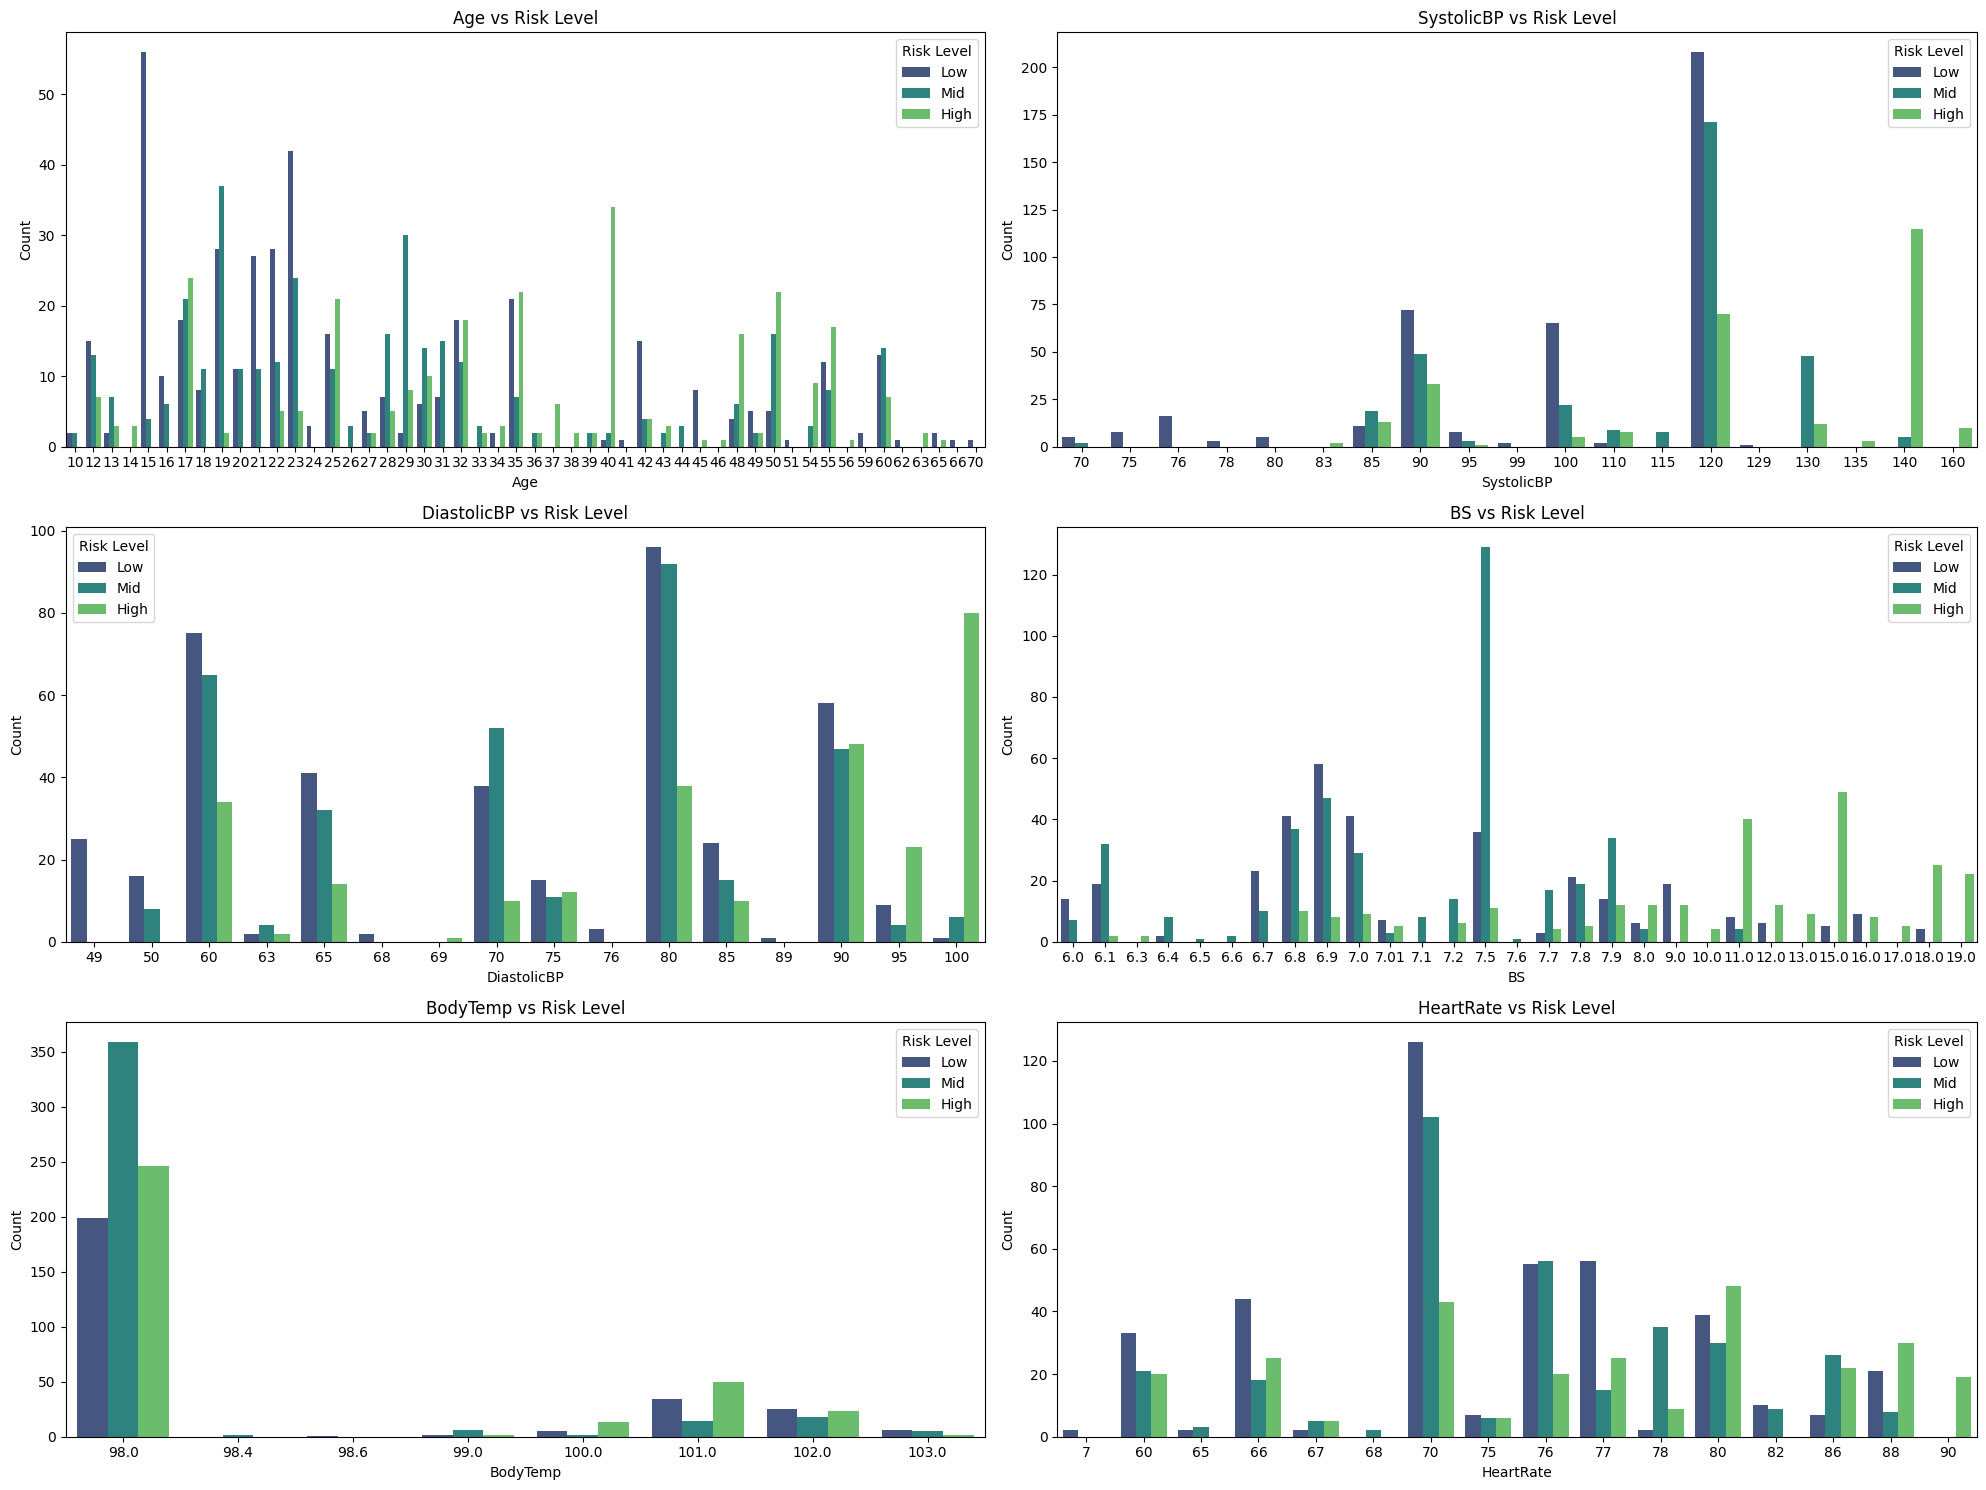

In [ ]:
# Encode RiskLevel
def encode_risk(value):
    mapping = {"low risk": 1, "mid risk": 2, "high risk": 3}
    return mapping.get(value.lower(), 0)  # Default to 0 for unknown values

# Apply encoding to the 'RiskLevel' column
data['RiskLevel_encoded'] = data['RiskLevel'].apply(encode_risk)

# Define columns for comparison
columns_to_compare = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Create subplots for count plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_compare, 1):
    plt.subplot(3, 2, i)  # Create a grid layout: 3 rows, 2 columns
    if col in data.columns:
        # Plot count plot with hue as RiskLevel
        sns.countplot(x=col, hue='RiskLevel', data=data, palette='viridis', order=sorted(data[col].unique()))
        plt.title(f'{col} vs Risk Level')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Risk Level', labels=['Low', 'Mid', 'High'])
    else:
        print(f"Column '{col}' not found in the dataset. Skipping visualization.")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

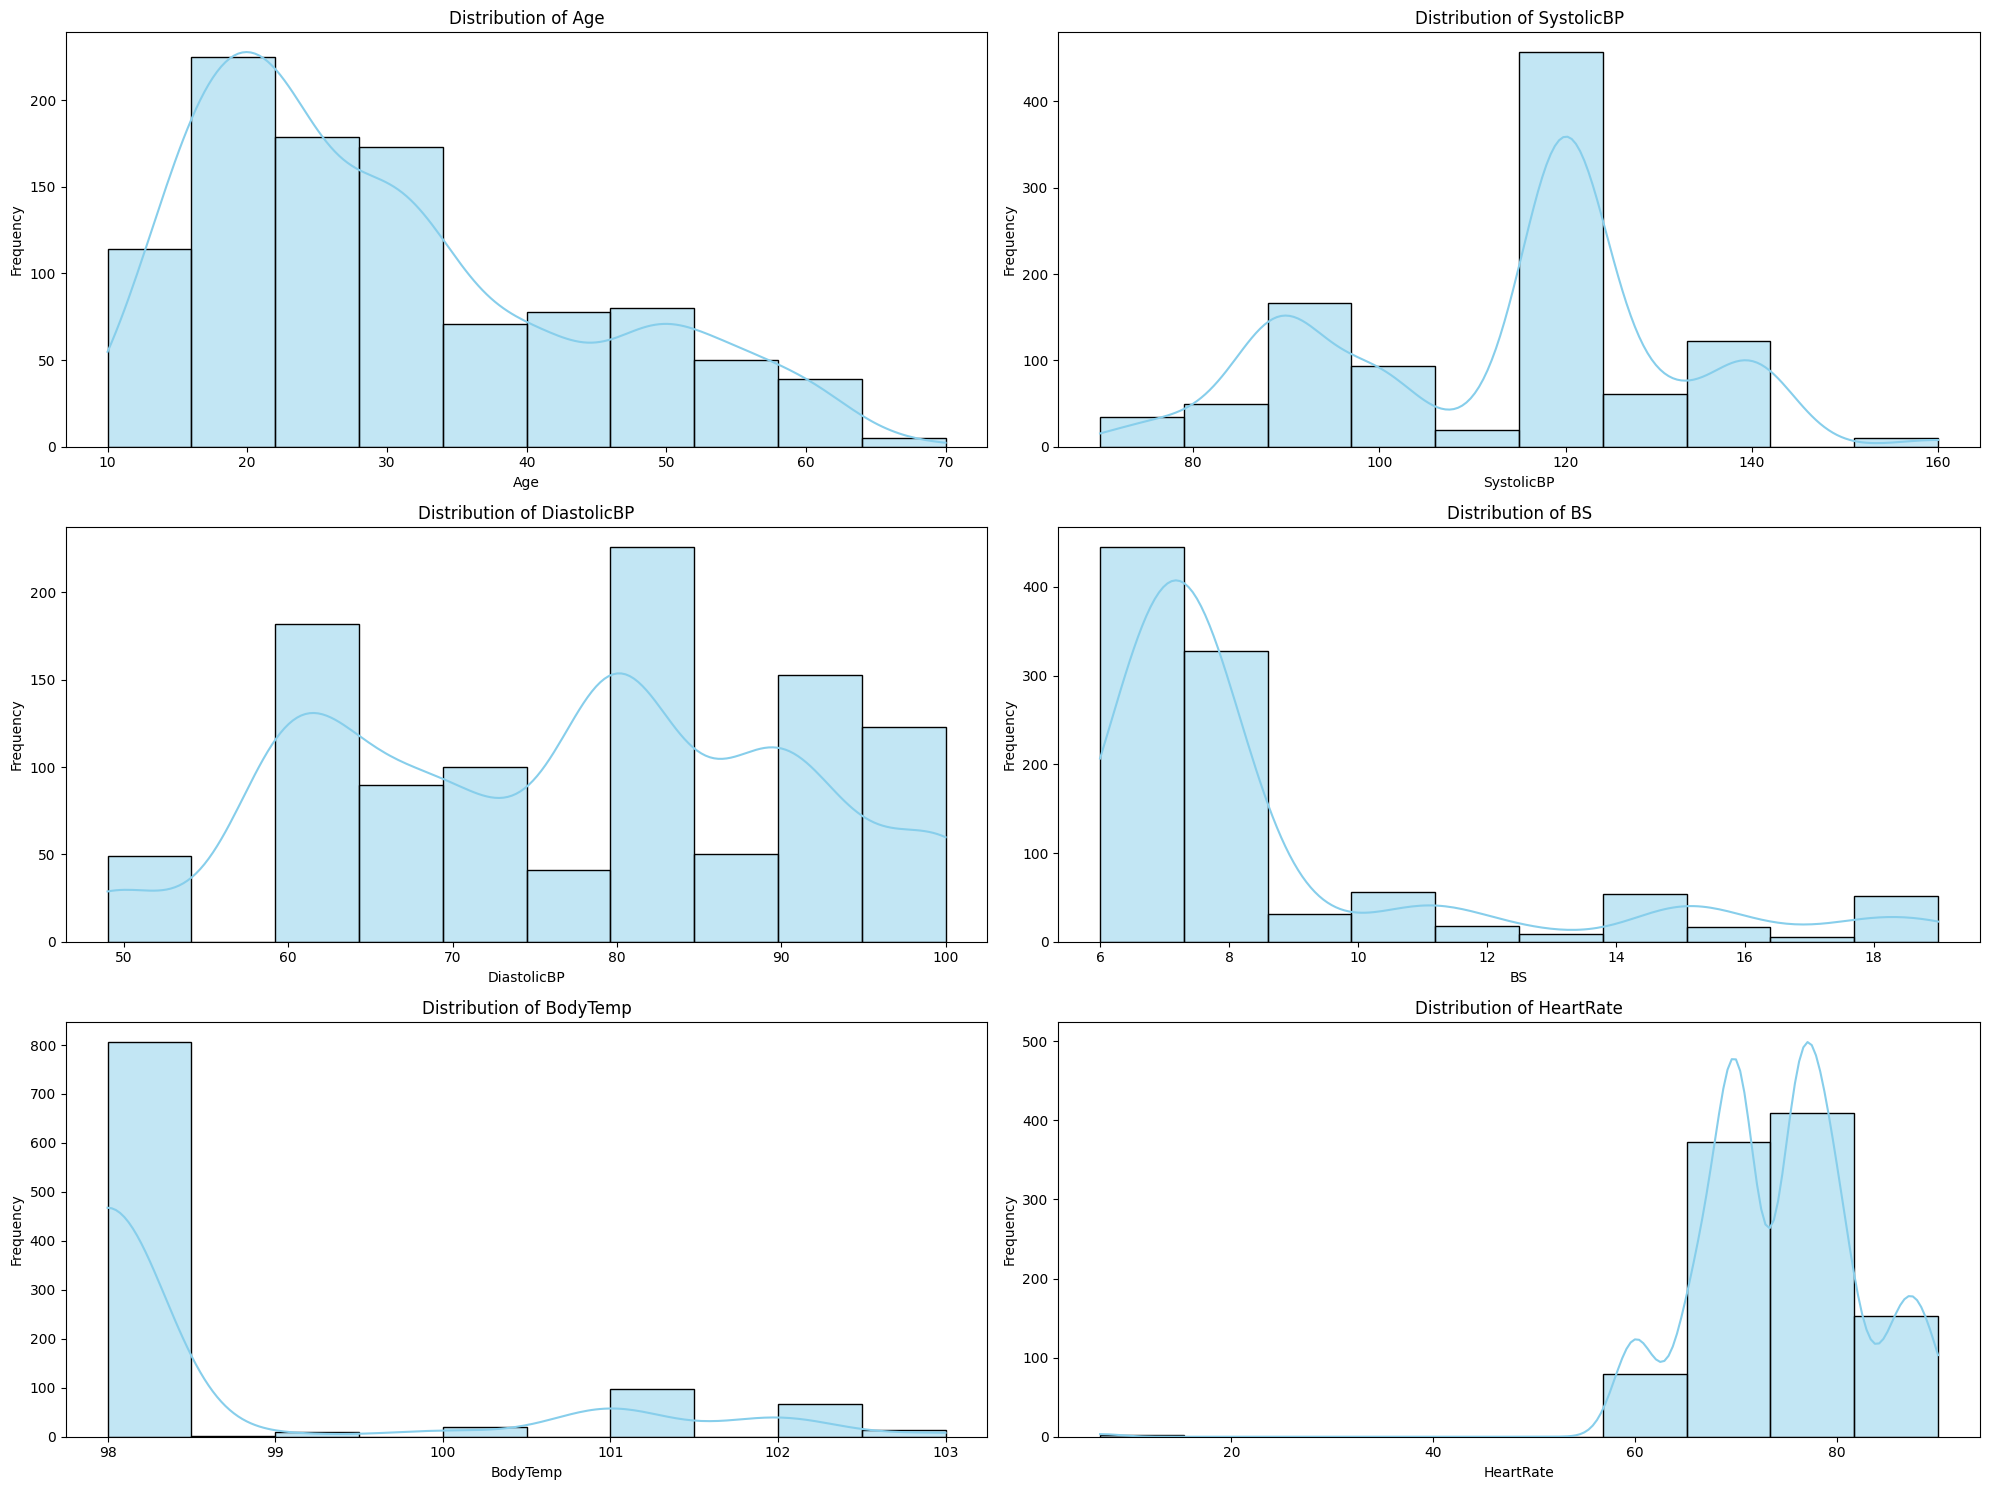

In [ ]:

# Define numerical features for plotting
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Set up the figure size and layout for subplots
plt.figure(figsize=(20, 15))

# Loop through each numerical feature and plot a histogram with a KDE line
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)  # Create a subplot grid of 3 rows and 2 columns
    sns.histplot(data[col], kde=True, bins=10, color='skyblue')  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


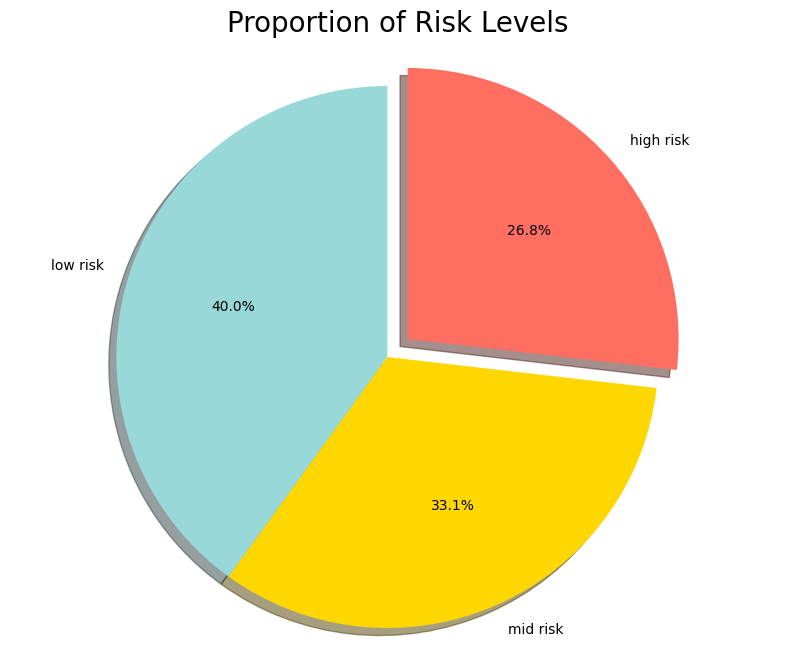

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'Maternal Health Risk Data Set.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Define labels and sizes for the pie chart based on the 'RiskLevel' column
labels = data['RiskLevel'].value_counts().index  # Unique risk categories
sizes = data['RiskLevel'].value_counts().values  # Counts of each category
explode = [0.1 if label == 'high risk' else 0 for label in labels]  # Highlight 'high risk'

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(
    sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90, colors=['#98D8D8', '#FFD700', '#FF6F61']
)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.title("Proportion of Risk Levels", size=20)
plt.show()


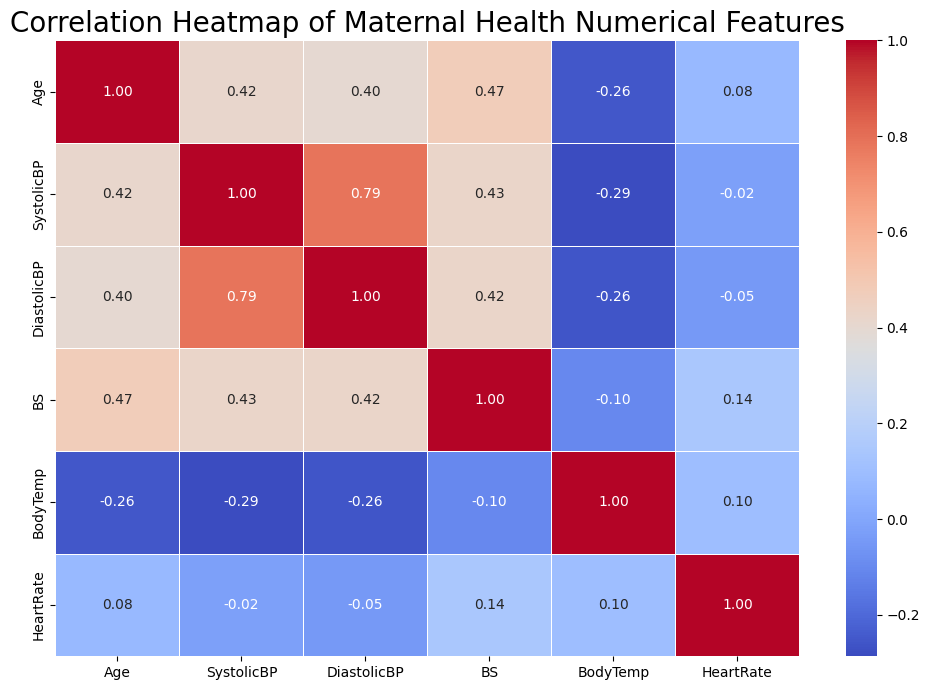

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'Maternal Health Risk Data Set.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select the numerical features for correlation analysis
numerical_features = [
    'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'
]

# Compute the correlation matrix for the selected numerical features
correlation_matrix = data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Maternal Health Numerical Features", size=20)
plt.show()


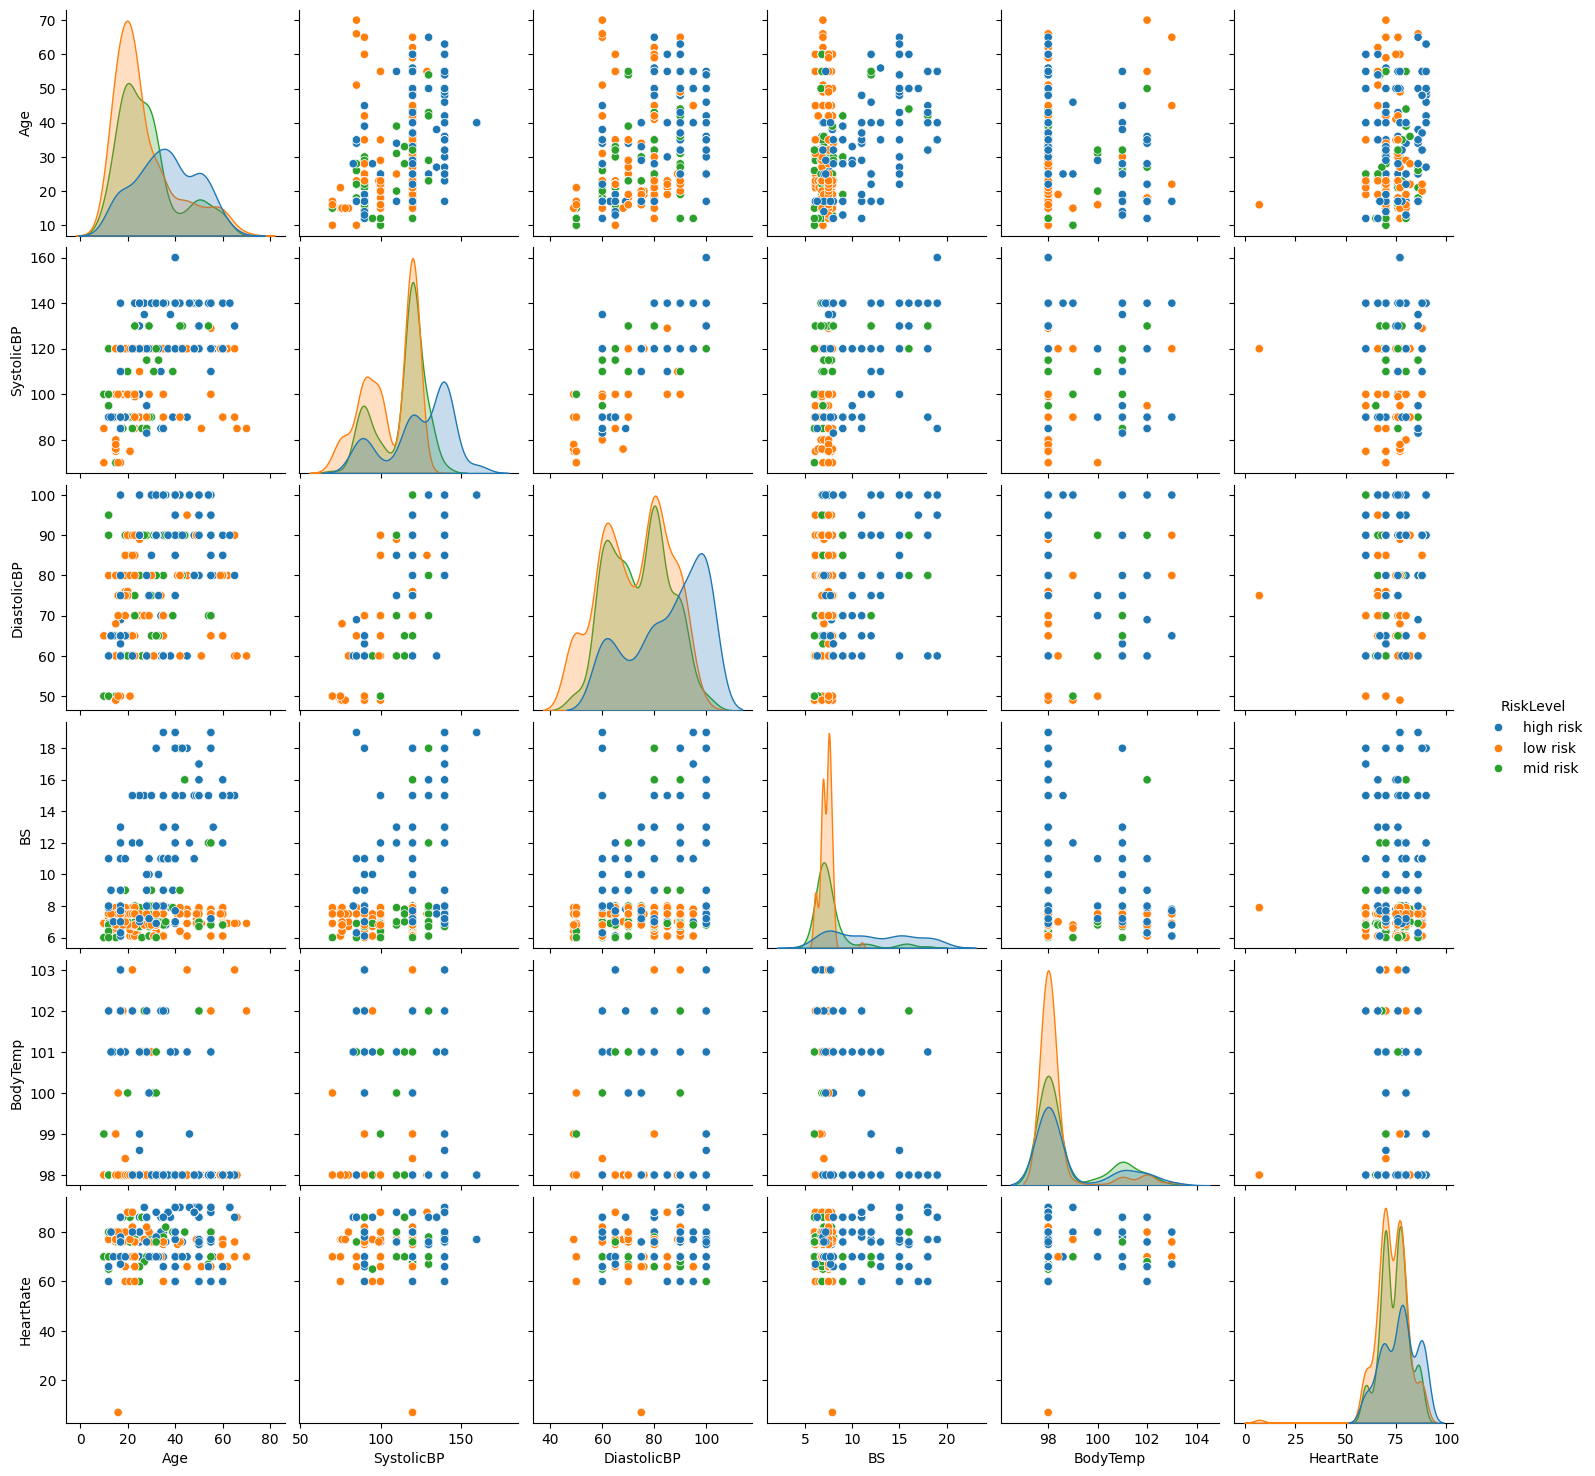

In [ ]:
sns.pairplot(data, diag_kind='kde',  hue="RiskLevel")

In [ ]:
df_with_outliers = data.copy()

# Display the first few rows of the new dataframe to confirm
print("Dataset with outliers saved successfully!")
print(df_with_outliers.head())

Dataset with outliers saved successfully!
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [ ]:
def handle_outliers_iqr(data, feature, fac=1.5):
    """
    Impute outliers in a given feature using the IQR method.

    Parameters:
    data (pd.DataFrame): The dataset
    feature (str): The feature/column to handle outliers for
    fac (float): The multiplier for the IQR (default is 1.5)

    Returns:
    pd.DataFrame: The modified dataset with outliers handled
    """
    Q1 = data[f"{feature}"].quantile(0.25)  # 1st Quartile
    Q3 = data[f"{feature}"].quantile(0.75)  # 3rd Quartile
    IQR = Q3 - Q1                           # Interquartile Range
    lower_limit = Q1 - fac * IQR            # Lower Bound
    upper_limit = Q3 + fac * IQR            # Upper Bound

    # Replace outliers with the mean value of the feature
    data.loc[(data[feature] < lower_limit) | (data[feature] > upper_limit), feature] = data[feature].mean()
    return data

# Apply the function to handle outliers for numerical columns in your dataset
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Creating a copy of the dataset to preserve the original data
data_cleaned = data.copy()

# Handling outliers for each numerical feature
for feature in numerical_features:
    data_cleaned = handle_outliers_iqr(data_cleaned, feature)

# Display the cleaned data
print(data_cleaned.describe())


               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.832221   112.736669    76.460552     7.523281    98.137740   
std      13.415211    17.800781    13.885796     0.834262     0.269646   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      66.000000   140.000000   100.000000     9.000000    98.665089   

        HeartRate  
count  1014.00000  
mean     74.43452  
std       7.51443  
min      60.00000  
25%      70.00000  
50%      76.00000  
75%      80.00000  
max      90.00000  


<ipython-input-15-819ff3a6dfc0>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.871794871794872' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[feature] < lower_limit) | (data[feature] > upper_limit), feature] = data[feature].mean()
<ipython-input-15-819ff3a6dfc0>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '113.19822485207101' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[feature] < lower_limit) | (data[feature] > upper_limit), feature] = data[feature].mean()
<ipython-input-15-819ff3a6dfc0>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '76.46055226824457' has dtype incompatible with int64, please explicitly cast to

In [ ]:
# Apply the IQR method to handle outliers for 'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'
data = handle_outliers_iqr(data, "Age", 1.5)
data = handle_outliers_iqr(data, "SystolicBP", 1.5)
data = handle_outliers_iqr(data, "DiastolicBP", 1.5)
data = handle_outliers_iqr(data, "BS", 1.5)
data = handle_outliers_iqr(data, "BodyTemp", 1.5)
data = handle_outliers_iqr(data, "HeartRate", 1.5)

# Optional: Check the cleaned data after handling outliers
print(data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']].describe())


               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.832221   112.736669    76.460552     7.523281    98.137740   
std      13.415211    17.800781    13.885796     0.834262     0.269646   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      66.000000   140.000000   100.000000     9.000000    98.665089   

        HeartRate  
count  1014.00000  
mean     74.43452  
std       7.51443  
min      60.00000  
25%      70.00000  
50%      76.00000  
75%      80.00000  
max      90.00000  


<ipython-input-15-819ff3a6dfc0>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.871794871794872' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[feature] < lower_limit) | (data[feature] > upper_limit), feature] = data[feature].mean()
<ipython-input-15-819ff3a6dfc0>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '113.19822485207101' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[feature] < lower_limit) | (data[feature] > upper_limit), feature] = data[feature].mean()
<ipython-input-15-819ff3a6dfc0>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '76.46055226824457' has dtype incompatible with int64, please explicitly cast to

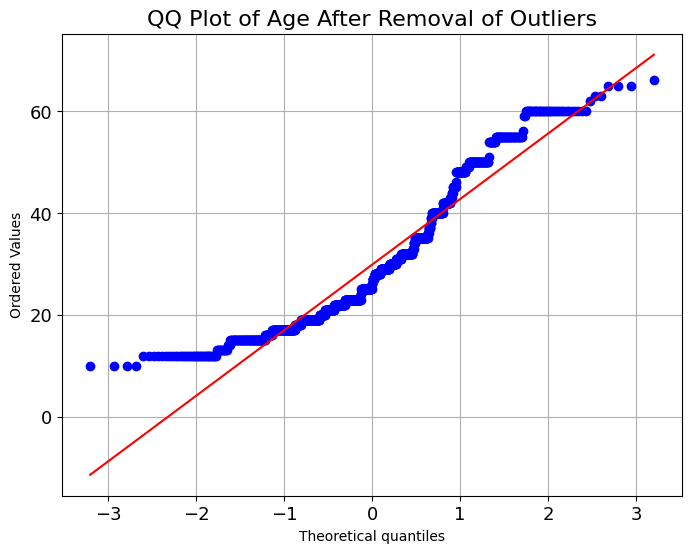

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

# Checking the distribution of the 'Age' column after the removal of outliers
fig = plt.figure(figsize=(8, 6))
stats.probplot(data["Age"], dist="norm", plot=plt)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.title('QQ Plot of Age After Removal of Outliers', fontsize=16)
plt.show()


<Axes: >

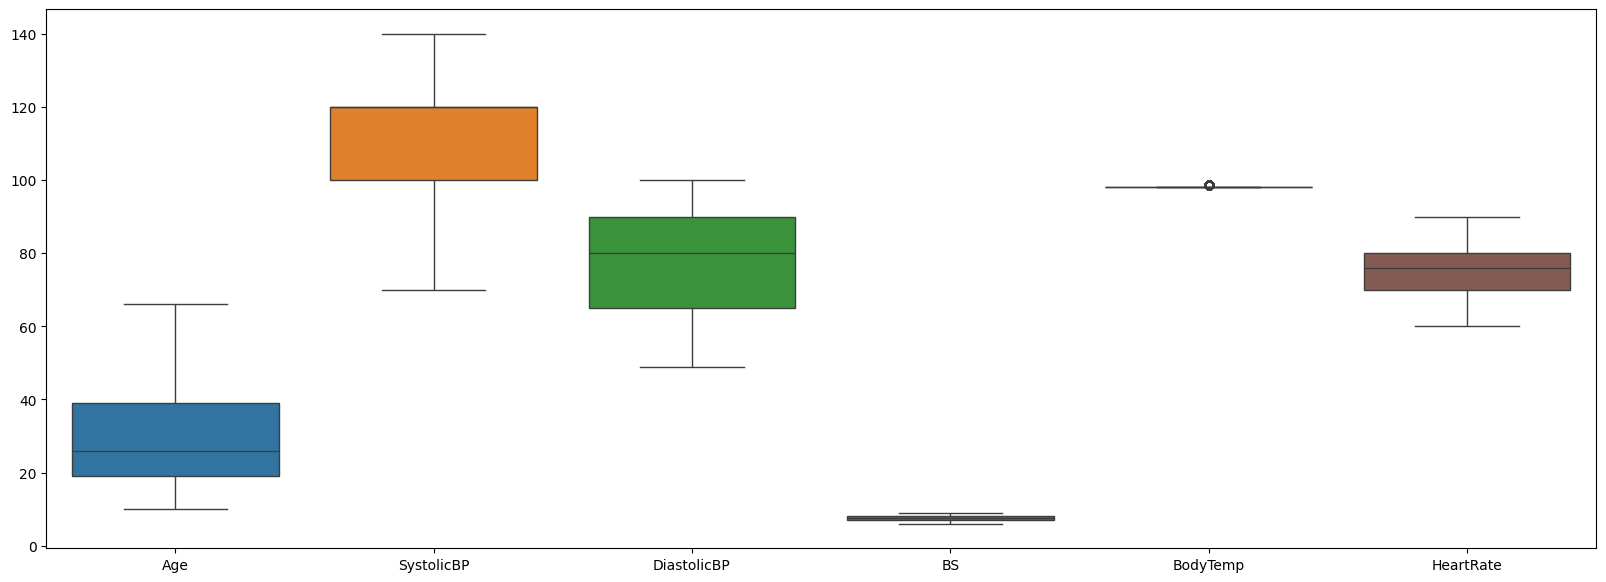

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the features you want to scale
features_to_scale = [
    'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'
]

# Apply MinMax scaling to the selected features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Display the first few rows of the scaled data
data[features_to_scale].head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,0.267857,0.857143,0.607843,0.908662,0.0,0.866667
1,0.446429,1.000000,0.803922,0.908662,0.0,0.333333
2,0.339286,0.285714,0.411765,0.666667,1.0,0.666667
3,0.357143,1.000000,0.705882,0.333333,0.0,0.333333
4,0.446429,0.714286,0.215686,0.033333,0.0,0.533333


<Axes: >

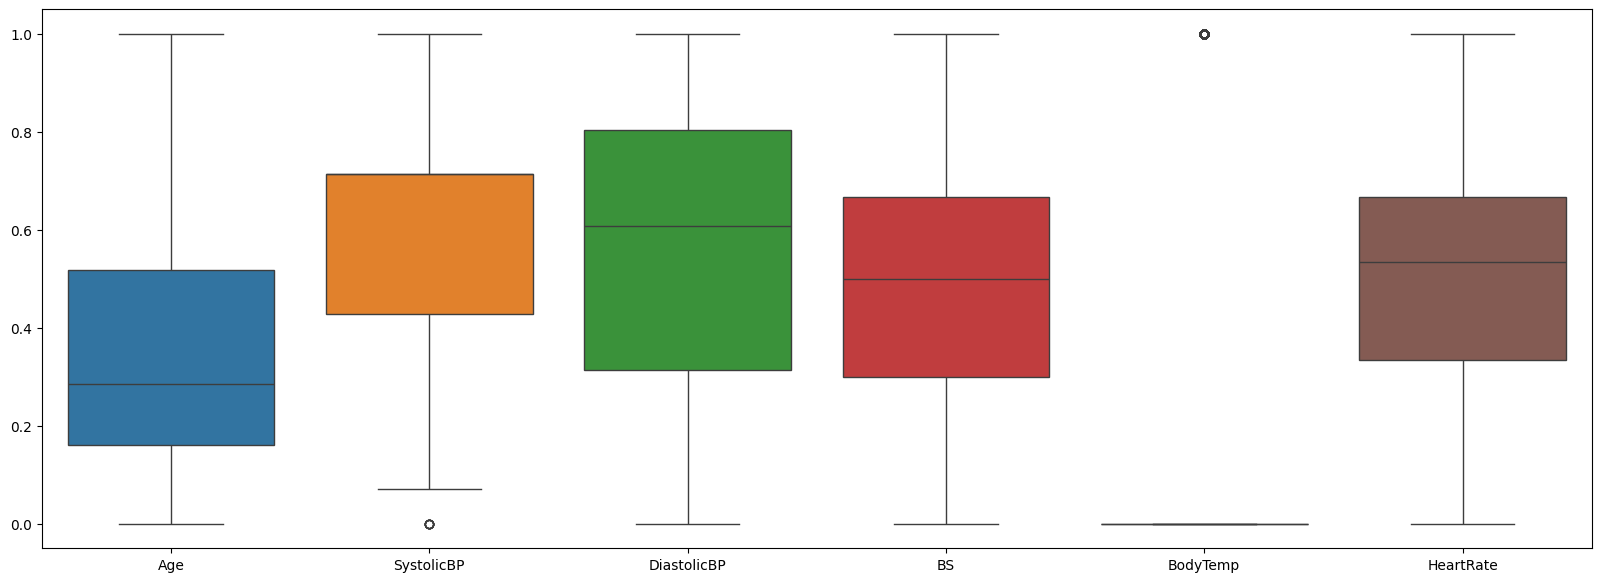

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data)

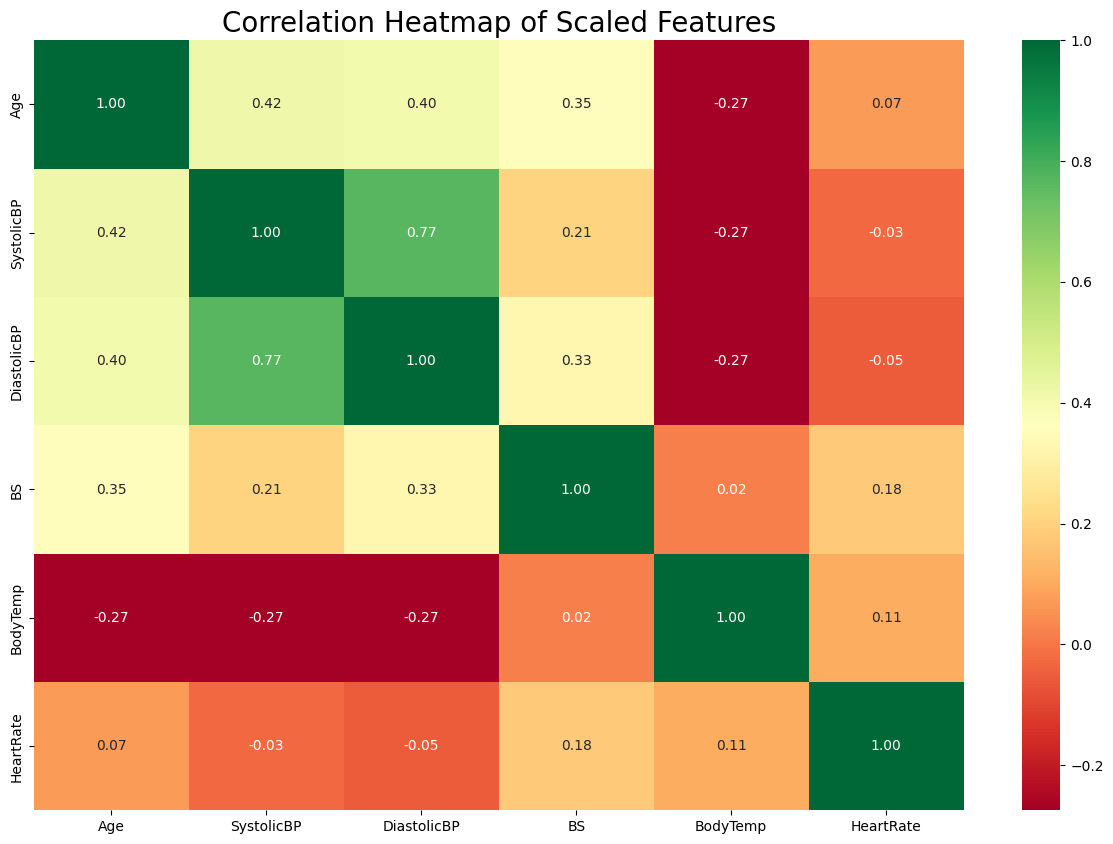

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix for scaled features
correlation_matrix = data[
    ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
].corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Correlation Heatmap of Scaled Features", size=20)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_scaled = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]  # Use the scaled features from your dataset
y = data['RiskLevel']  # Replace 'target' with the actual column name for your target variable

# Split Data into Training and Testing Sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

   high risk       0.70      0.79      0.74        47
    low risk       0.64      0.86      0.74        80
    mid risk       0.60      0.34      0.44        76

    accuracy                           0.65       203
   macro avg       0.65      0.66      0.64       203
weighted avg       0.64      0.65      0.63       203



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.79      0.82        80
    mid risk       0.76      0.84      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.82      0.82       203



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.87      0.87        47
    low risk       0.83      0.75      0.79        80
    mid risk       0.74      0.82      0.78        76

    accuracy                           0.80       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



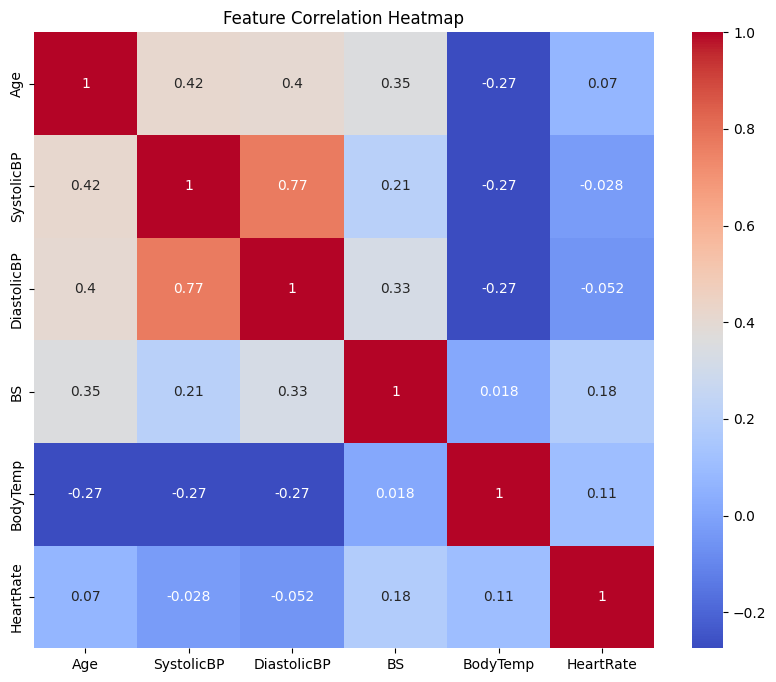

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['RiskLevel']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

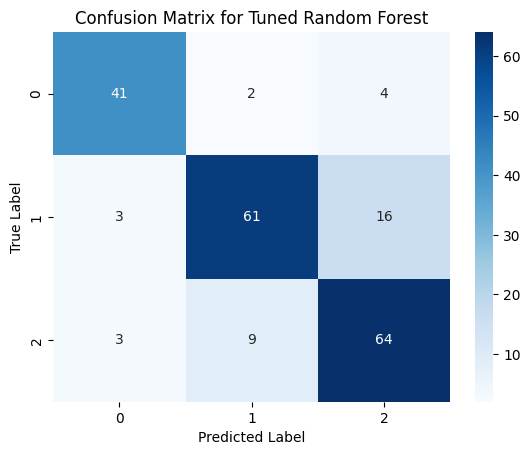

In [ ]:
# Confusion Matrix for Best Model
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Tuned Random Forest")
plt.show()

Feature Importance Analysis for Maternal Health Risk Levels:
       Feature  Importance
3           BS    0.356209
1   SystolicBP    0.181156
0          Age    0.179123
2  DiastolicBP    0.128100
5    HeartRate    0.114262
4     BodyTemp    0.041150


<ipython-input-30-a1ef5c81f538>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


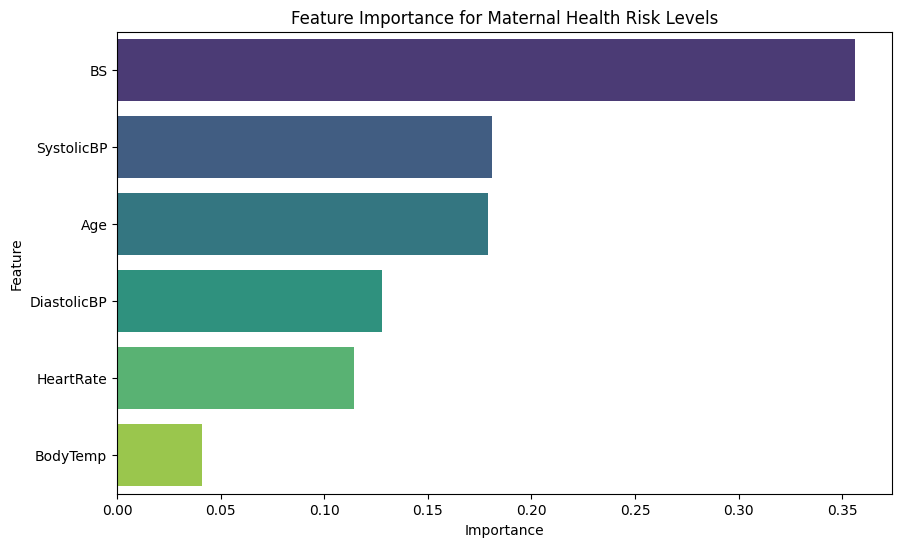


The factor most strongly influencing maternal health risk levels is:
Feature             BS
Importance    0.356209
Name: 3, dtype: object


In [ ]:


# Get feature importances from the Random Forest model
feature_importances = best_rf.feature_importances_

# Create a DataFrame to display the importance of each feature
features = X_scaled.columns  # Features used in the model
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important feature
print("Feature Importance Analysis for Maternal Health Risk Levels:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Maternal Health Risk Levels")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# The most influential factor (the top feature)
most_influential_feature = importance_df.iloc[0]
print("\nThe factor most strongly influencing maternal health risk levels is:")
print(most_influential_feature)
